# Fire polygons detected by Lilian Vallet and the BAM method 



In [1]:
#load csv
import pandas as pd

filename = '/Users/arthurcalvi/Data/Disturbances_maps/FirePolygons/FFUD_Arthur/FFUD_Inventory_Arthur.csv'

df = pd.read_csv(filename, sep=';')


In [2]:
col_uuid = ['annee', 'code_insee', 'nom_de_la_commune', 'date_de_premiere_alerte', 'numero']
#format date de premiere alerte
df['date_de_premiere_alerte'] = pd.to_datetime(df['date_de_premiere_alerte'])
df['date_de_premiere_alerte'] = df['date_de_premiere_alerte'].apply(lambda x: x.strftime('%Y-%m-%d'))
#create unique key from col_uuid 
df['uuid'] = df[col_uuid].apply(lambda x: '_'.join(x.astype(str)), axis=1)

In [3]:
df

,UID,Polygon_ID,annee,numero,departement,code_insee,nom_de_la_commune,date_de_premiere_alerte,origine_de_lalerte,moyens_de_premiere_intervention,...,nombre_de_deces,nombre_de_batiments_totalement_detruits,nombre_de_batiments_partiellement_detruits,hygrometrie_percent,vitesse_moyenne_du_vent_km_h,direction_du_vent,temperature_c,precision_de_la_donnee,presence_dun_contour_valide,uuid
0,B-2017-02386,A-081,2017,12050,2B,2B188,Olmeta-di-Tuda,2017-07-24,Indéterminé,NaN,...,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,Non,2017_2B188_Olmeta-di-Tuda_2017-07-24_12050
1,B-2019-00115,NaN,2019,229,974,97419,Sainte-Rose,2019-01-20,Indéterminé,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2019_97419_Sainte-Rose_2019-01-20_229
2,B-2017-02424,A-243,2017,12221,83,83006,Artigues,2017-07-24,Population,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2017_83006_Artigues_2017-07-24_12221
3,B-2017-02641,A-091,2017,13571,2B,2B178,Nonza,2017-08-11,Indéterminé,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2017_2B178_Nonza_2017-08-11_13571
4,B-2017-03059,A-093,2017,15505,2B,2B352,Ville-di-Paraso,2017-10-20,Indéterminé,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2017_2B352_Ville-di-Paraso_2017-10-20_15505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11150,B-2020-00969,NaN,2020,4379,976,97601,Acoua,2020-10-10,Indéterminé,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2020_97601_Acoua_2020-10-10_4379
11151,B-2020-00638,NaN,2020,3156,77,77186,Fontainebleau,2020-10-18,Indéterminé,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2020_77186_Fontainebleau_2020-10-18_3156
11152,B-2020-00629,NaN,2020,3049,88,88106,Ban-sur-Meurthe-Clefcy,2020-10-21,Indéterminé,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2020_88106_Ban-sur-Meurthe-Clefcy_2020-10-21_3049
11153,B-2020-02685,NaN,2020,17185,2A,2A028,Balogna,2020-10-25,Indéterminé,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2020_2A028_Balogna_2020-10-25_17185


In [4]:
import os 
import geopandas as gpd
from tqdm import tqdm 
UID_unique = os.listdir('/Users/arthurcalvi/Data/Disturbances_maps/FirePolygons/FFUD_Arthur/Fire_folder')
list_polygons = []
for uid in tqdm(UID_unique):
    polygon_file = os.path.join('/Users/arthurcalvi/Data/Disturbances_maps/FirePolygons/FFUD_Arthur/Fire_folder', uid)
    #Load gpkg
    gdf = gpd.read_file(polygon_file).to_crs('EPSG:2154')
    list_polygons.append(gdf)


    

100%|██████████| 151/151 [00:06<00:00, 22.54it/s]


In [5]:
gdf = gpd.GeoDataFrame(pd.concat(list_polygons), geometry='geometry', crs=list_polygons[0].crs)

/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

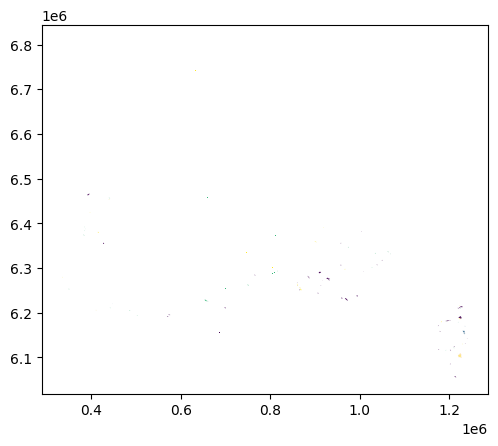

In [6]:
gdf.plot(column='annee')

In [7]:
#select rows of df if they are in gdf.UID
df_polygons = df[df['UID'].isin(gdf.UID)]
#add geometry to df_polygons
df_polygons = df_polygons.merge(gdf[['UID', 'geometry']], on='UID', how='left')

In [8]:
df_polygons.columns

Index(['UID', 'Polygon_ID', 'annee', 'numero', 'departement', 'code_insee',
       'nom_de_la_commune', 'date_de_premiere_alerte', 'origine_de_lalerte',
       'moyens_de_premiere_intervention', 'surface_parcourue_m2',
       'surface_parcourue_ha', 'Polygon_area_ha', 'surface_foret_m2',
       'surface_maquis_garrigues_m2',
       'autres_surfaces_naturelles_hors_foret_m2', 'surfaces_agricoles_m2',
       'autres_surfaces_m2', 'surface_autres_terres_boisees_m2',
       'surfaces_non_boisees_naturelles_m2',
       'surfaces_non_boisees_artificialisees_m2', 'surfaces_non_boisees_m2',
       'precision_des_surfaces',
       'surface_de_feu_a_larrivee_des_secours_0_1_ha',
       'voie_carrossable_la_plus_proche',
       'activite_ou_habitation_la_plus_proche', 'type_de_peuplement',
       'connaissance', 'source_de_lenquete', 'nature',
       'intervention_de_lequipe_rcci', 'deces_ou_batiments_touches',
       'nombre_de_deces', 'nombre_de_batiments_totalement_detruits',
       'nombre_de

In [9]:
df_polygons

,UID,Polygon_ID,annee,numero,departement,code_insee,nom_de_la_commune,date_de_premiere_alerte,origine_de_lalerte,moyens_de_premiere_intervention,...,nombre_de_batiments_totalement_detruits,nombre_de_batiments_partiellement_detruits,hygrometrie_percent,vitesse_moyenne_du_vent_km_h,direction_du_vent,temperature_c,precision_de_la_donnee,presence_dun_contour_valide,uuid,geometry
0,B-2017-02386,A-081,2017,12050,2B,2B188,Olmeta-di-Tuda,2017-07-24,Indéterminé,NaN,...,NaN,NaN,NaN,100.0,NaN,NaN,NaN,Non,2017_2B188_Olmeta-di-Tuda_2017-07-24_12050,"MULTIPOLYGON (((1227027.523 6187008.939, 12270..."
1,B-2017-02424,A-243,2017,12221,83,83006,Artigues,2017-07-24,Population,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2017_83006_Artigues_2017-07-24_12221,"MULTIPOLYGON (((930745.209 6274462.519, 930745..."
2,B-2017-02641,A-091,2017,13571,2B,2B178,Nonza,2017-08-11,Indéterminé,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2017_2B178_Nonza_2017-08-11_13571,"MULTIPOLYGON (((1222032.011 6209249.177, 12220..."
3,B-2017-03059,A-093,2017,15505,2B,2B352,Ville-di-Paraso,2017-10-20,Indéterminé,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2017_2B352_Ville-di-Paraso_2017-10-20_15505,"MULTIPOLYGON (((1195139.867 6180154.587, 11951..."
4,B-2017-02284,A-254,2017,11720,83,83071,Londe-les-Maures (La),2017-07-25,Population,3.0,...,NaN,NaN,38.0,35.0,NO,25.0,NaN,Non,2017_83071_Londe-les-Maures (La)_2017-07-25_11720,"MULTIPOLYGON (((973675.292 6227024.395, 973675..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,B-2019-00122,T-121,2019,261,9,9138,L'Herm,2019-02-27,Indéterminé,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2019_9138_L'Herm_2019-02-27_261,"MULTIPOLYGON (((591304.905 6211624.465, 591304..."
143,B-2017-02666,T-122,2017,13688,2B,2B143,Linguizzetta,2017-09-02,Indéterminé,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2017_2B143_Linguizzetta_2017-09-02_13688,"MULTIPOLYGON (((1240004.948 6142460.392, 12400..."
144,B-2018-00325,T-172,2018,605,81,81307,Valdurenque,2018-10-02,Indéterminé,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2018_81307_Valdurenque_2018-10-02_605,"MULTIPOLYGON (((645459.199 6273123.723, 645459..."
145,B-2020-01655,Q-281,2020,12560,2A,2A254,Quenza,2020-02-04,Indéterminé,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,2020_2A254_Quenza_2020-02-04_12560,"MULTIPOLYGON (((1227515.798 6099940.910, 12275..."


In [10]:
import geopandas as gpd
gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry='geometry', crs='EPSG:2154')
col = ['uuid', 'annee', 'date_de_premiere_alerte', 'surface_foret_m2', 'type_de_peuplement', 'nom_de_la_commune', 'geometry']
gdf_polygons = gdf_polygons[col]
gdf_polygons.rename(columns={'annee':'year', 'date_de_premiere_alerte':'start_date', 'surface_foret_m2':'forest_area_m2', 'type_de_peuplement':'essence', 'nom_de_la_commune':'name'}, inplace=True)
gdf_polygons['keep'] = True

In [11]:
gdf_polygons

,uuid,year,start_date,forest_area_m2,essence,name,geometry,keep
0,2017_2B188_Olmeta-di-Tuda_2017-07-24_12050,2017,2017-07-24,1380000.0,1.0,Olmeta-di-Tuda,"MULTIPOLYGON (((1227027.523 6187008.939, 12270...",True
1,2017_83006_Artigues_2017-07-24_12221,2017,2017-07-24,15870000.0,2.0,Artigues,"MULTIPOLYGON (((930745.209 6274462.519, 930745...",True
2,2017_2B178_Nonza_2017-08-11_13571,2017,2017-08-11,360000.0,1.0,Nonza,"MULTIPOLYGON (((1222032.011 6209249.177, 12220...",True
3,2017_2B352_Ville-di-Paraso_2017-10-20_15505,2017,2017-10-20,7800.0,1.0,Ville-di-Paraso,"MULTIPOLYGON (((1195139.867 6180154.587, 11951...",True
4,2017_83071_Londe-les-Maures (La)_2017-07-25_11720,2017,2017-07-25,14230000.0,1.0,Londe-les-Maures (La),"MULTIPOLYGON (((973675.292 6227024.395, 973675...",True
...,...,...,...,...,...,...,...,...
142,2019_9138_L'Herm_2019-02-27_261,2019,2019-02-27,400000.0,NaN,L'Herm,"MULTIPOLYGON (((591304.905 6211624.465, 591304...",True
143,2017_2B143_Linguizzetta_2017-09-02_13688,2017,2017-09-02,NaN,1.0,Linguizzetta,"MULTIPOLYGON (((1240004.948 6142460.392, 12400...",True
144,2018_81307_Valdurenque_2018-10-02_605,2018,2018-10-02,400000.0,NaN,Valdurenque,"MULTIPOLYGON (((645459.199 6273123.723, 645459...",True
145,2020_2A254_Quenza_2020-02-04_12560,2020,2020-02-04,30381100.0,5.0,Quenza,"MULTIPOLYGON (((1227515.798 6099940.910, 12275...",True


In [12]:
bdforet30 = gpd.read_parquet('../data/processed_datasets/BDFORET_EPSG2154_FR_simplified30.parquet')
import pandas as pd
import numpy as np

def get_tree_species(row):

    index = bdforet30.sindex.query(row.geometry, predicate='intersects')
    if len(index) == 1:
        index = index[0]
        return bdforet30.iloc[index][['tree_type', 'essence']]
    elif len(index) > 1:
        sub = bdforet30.iloc[index]
        if len(sub.tree_type.unique().tolist()) > 1:
            tree_type = 'Mixed' 
        else : 
            tree_type = sub.tree_type.iloc[0] if type(sub.tree_type.iloc[0]) == str else np.nan 
        essence = ",".join([x for x in sub.essence.unique().tolist() if type(x) == str and x not in ['nr', 'none']])
        #put in a pandas series with tree_type and essence as row names
        return pd.Series([tree_type, essence], index=['tree_type', 'essence'])
    else :
        return None, None

gdf_polygons[['tree_type', 'essence']] = gdf_polygons.apply(get_tree_species, axis=1, result_type='expand')

In [13]:
gdf_polygons

,uuid,year,start_date,forest_area_m2,essence,name,geometry,keep,tree_type
0,2017_2B188_Olmeta-di-Tuda_2017-07-24_12050,2017,2017-07-24,1380000.0,"broadleaf,evergreen oaks",Olmeta-di-Tuda,"MULTIPOLYGON (((1227027.523 6187008.939, 12270...",True,Mixed
1,2017_83006_Artigues_2017-07-24_12221,2017,2017-07-24,15870000.0,"evergreen oaks,mixed,broadleaf,aleppo pine,dec...",Artigues,"MULTIPOLYGON (((930745.209 6274462.519, 930745...",True,Mixed
2,2017_2B178_Nonza_2017-08-11_13571,2017,2017-08-11,360000.0,"broadleaf,evergreen oaks,chestnut",Nonza,"MULTIPOLYGON (((1222032.011 6209249.177, 12220...",True,Mixed
3,2017_2B352_Ville-di-Paraso_2017-10-20_15505,2017,2017-10-20,7800.0,"broadleaf,conifers,chestnut,evergreen oaks",Ville-di-Paraso,"MULTIPOLYGON (((1195139.867 6180154.587, 11951...",True,Mixed
4,2017_83071_Londe-les-Maures (La)_2017-07-25_11720,2017,2017-07-25,14230000.0,"evergreen oaks,mixed,broadleaf,aleppo pine,con...",Londe-les-Maures (La),"MULTIPOLYGON (((973675.292 6227024.395, 973675...",True,Mixed
...,...,...,...,...,...,...,...,...,...
142,2019_9138_L'Herm_2019-02-27_261,2019,2019-02-27,400000.0,"mixed,deciduous oaks,laricio pine, black pine",L'Herm,"MULTIPOLYGON (((591304.905 6211624.465, 591304...",True,Mixed
143,2017_2B143_Linguizzetta_2017-09-02_13688,2017,2017-09-02,NaN,broadleaf,Linguizzetta,"MULTIPOLYGON (((1240004.948 6142460.392, 12400...",True,Mixed
144,2018_81307_Valdurenque_2018-10-02_605,2018,2018-10-02,400000.0,"mixed,conifers",Valdurenque,"MULTIPOLYGON (((645459.199 6273123.723, 645459...",True,Mixed
145,2020_2A254_Quenza_2020-02-04_12560,2020,2020-02-04,30381100.0,"maritime pine,broadleaf,mixed,conifers,evergre...",Quenza,"MULTIPOLYGON (((1227515.798 6099940.910, 12275...",True,Mixed


In [16]:
gdf_polygons.to_parquet('../data/processed_datasets/simplified_firepolygons_2017_2020_FR_EPSG2154.parquet')

# Processed BDIF


In [56]:
import geopandas as gpd
bdiff = gpd.read_parquet('../data/processed_datasets/simplified_bdiff_2012_2022_FR_EPSG2154.parquet') #ok 

In [58]:
bdiff['keep'] = False

In [66]:
gdf_polygons.columns

Index(['uuid', 'year', 'start_date', 'forest_area_m2', 'essence', 'name',
       'geometry', 'keep'],
      dtype='object')

In [67]:
bdiff.columns

Index(['uuid', 'year', 'start_date', 'forest_area_m2', 'essence', 'level_0',
       'name', 'geometry', 'tree_type', 'keep'],
      dtype='object')

In [70]:
#concatenate gdf_polygons and bdiff
gdf_ = pd.concat([gdf_polygons, bdiff], ignore_index=True)
#if duplicates on UUID, keep the one with keep == True
gdf_ = gdf_.sort_values('keep', ascending=False).drop_duplicates('uuid')

In [75]:
gdf_['essence'] = gdf_['essence'].astype(str)
gdf_.to_parquet('../data/processed_datasets/simplified_merge_lilan_bdiff_2012_2022_FR_EPSG2154.parquet')